In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.api as keras
from keras.api.layers import *
from src import custom_callback

2025-05-30 16:52:53.303910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-30 16:52:53.319675: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-30 16:52:53.324392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-30 16:52:53.335942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-30 16:52:54.549882: W tensorflow/compiler/tf2

In [3]:
res = '224'

train = keras.preprocessing.image_dataset_from_directory(
    directory=f'../aptos2019_{res}x{res}/train_0-1-2-3-4',
    shuffle=True,
    seed=777,
    image_size=(int(res),int(res)),
)
test = keras.preprocessing.image_dataset_from_directory(
    directory=f'../aptos2019_{res}x{res}/val_0-1-2-3-4',
    shuffle=True,
    seed=777,
    batch_size=5,
    image_size=(int(res),int(res)),

)

weight = {
    0:2929/1433.,
    1:2929/300.,
    2:2929/808.,
    3:2929/154.,
    4:2929/234.,
}

Found 2929 files belonging to 5 classes.


I0000 00:00:1747944661.544650    3601 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747944661.849479    3601 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747944661.849673    3601 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747944661.851102    3601 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Found 364 files belonging to 5 classes.


In [ ]:
input = Input((int(res),int(res),3))

x = Rescaling(1/255.)(input)
# x = RandomFlip('horizontal')(x)
# x = RandomFlip('vertical')(x)

model = keras.applications.MobileNet(
    input_tensor=x,
    include_top=False,
    weights=None
)

x = Flatten()(model.output)
x = Dropout(.3)(x)
x = Dense(128,activation='relu')(x)
x = Dense(128,activation='relu')(x)
# x = Dropout(.5)(x)
x = Dense(5,activation='softmax')(x)

model = keras.Model(input,x)

model.compile(
    optimizer=keras.optimizers.Adam(1e-5,.99),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='acc')]
)

# model.summary()

In [22]:
EPOCH = 800
model.fit(
    train,
    epochs=EPOCH,
    callbacks=[True_acc(train,test)],
    class_weight=weight
)

Epoch 1/800
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - acc: 0.2428 - loss: 10.9131 - train_loss: 1.8387 - train_acc: 0.1024 - val_loss: 1.8302 - val_acc: 0.1099
Epoch 2/800
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - acc: 0.2772 - loss: 10.2826 - train_loss: 1.8356 - train_acc: 0.0799 - val_loss: 1.8270 - val_acc: 0.0769
Epoch 3/800
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - acc: 0.3216 - loss: 9.7334 - train_loss: 1.7898 - train_acc: 0.1024 - val_loss: 1.7901 - val_acc: 0.1099
Epoch 4/800
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - acc: 0.3637 - loss: 9.4792 - train_loss: 1.8467 - train_acc: 0.1024 - val_loss: 1.8380 - val_acc: 0.1099
Epoch 5/800
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - acc: 0.3970 - loss: 9.1507 - train_loss: 1.7822 - train_acc: 0.0799 - val_loss: 1.7864 - val_acc: 0.0769
Epoch 6/800
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - acc: 0.4322 - loss: 8.3586 - train_loss: 1.7921 - train_acc: 0.1024 - val_loss: 1.7894 - val_acc: 0.1099
Epoch 7/800
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 

KeyboardInterrupt: 

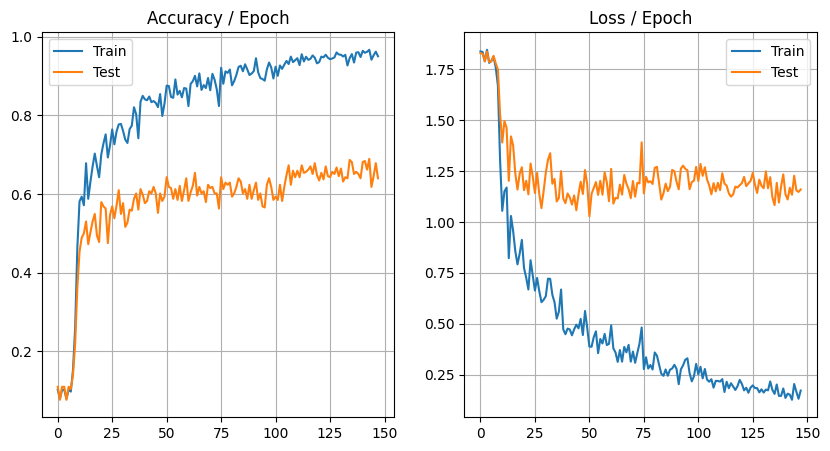

In [23]:
hist = model.history.history

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()

ax[0].plot(hist['train_acc'],label='Train')
ax[0].plot(hist['val_acc'],label='Test')
ax[0].grid(True,'both')
ax[0].set_title('Accuracy / Epoch')
ax[0].legend()

ax[1].plot(hist['train_loss'],label='Train')
ax[1].plot(hist['val_loss'],label='Test')
ax[1].grid(True,'both')
ax[1].set_title('Loss / Epoch')
ax[1].legend()

plt.show()